# Import Librairies




In [ ]:
# Import the required libraries for machine learning
import pandas as pd # data manipulation and analysis
import numpy as np # numerical operations
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

In [ ]:
# For splitting data into training and validation sets
from sklearn.model_selection import train_test_split

In [ ]:
# For data preprocessing and transformation
from sklearn.preprocessing import FunctionTransformer # transform data using user-defined function
from sklearn.preprocessing import OneHotEncoder # convert categorical features to numeric features
from sklearn.preprocessing import MinMaxScaler # scale features to a specified range
from sklearn.compose import ColumnTransformer # apply different transformations to different columns

In [ ]:
# For models
from sklearn.linear_model import LogisticRegression # binary classification model
from sklearn.linear_model import LinearRegression # regression model
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbors classification model
from sklearn.tree import DecisionTreeClassifier # decision tree classification model
from sklearn.svm import SVC # support vector machine classification model
from sklearn.ensemble import RandomForestClassifier # random forest classification model
from sklearn.ensemble import AdaBoostClassifier # AdaBoost classification model

In [ ]:
# For scoring and evaluation
from sklearn.metrics import mean_squared_error # mean squared error metric for regression
from sklearn.metrics import accuracy_score # accuracy metric for classification
from sklearn.metrics import confusion_matrix # confusion matrix for classification
from sklearn.metrics import classification_report # classification report for classification
from sklearn.model_selection import cross_val_score # cross validation for model evaluation

# Data Visualization

In [ ]:
# Load the dataset from a CSV file and store it in a pandas dataframe object
df = pd.read_csv('data.csv')

# Drop unnecessary columns from the dataframe
# The axis=1 argument specifies that we want to drop columns (as opposed to rows)
# The columns to drop are specified as a list of column names
# The resulting dataframe is stored back in the original variable
df = df.drop(["explicit", "id", "mode", "name", "release_date"], axis=1)

# Remove duplicate rows from the dataframe
# The duplicated() method returns a boolean array indicating whether each row is a duplicate of a previous row
# The ~ operator negates this array, so that True becomes False and vice versa
# The resulting boolean array is used to select all rows that are not duplicates using boolean indexing
# The resulting dataframe with no duplicates is stored back in the original variable
df = df[~df.duplicated()==1]


In [ ]:
#inspect the first few rows of a dataset
df.head()

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0.563,10,0.1510,-12.428,0,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0.901,8,0.0763,-28.454,0,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0.000,5,0.1190,-19.924,0,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0.887,1,0.1110,-14.734,0,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0.908,11,0.0980,-16.829,1,0.0424,62.149,0.0693,1928


In [ ]:
#inspect the last few rows of a dataset
df.tail()

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,0.000032,1,0.0891,-7.461,75,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0.031300,8,0.1110,-10.907,64,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0.002330,7,0.1080,-9.332,70,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0.000000,1,0.2220,-2.557,70,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0.000000,0,0.1050,-7.387,65,0.0271,80.588,0.366,2020


In [ ]:
#prints out the shape of a dataset
print('Dataset: ', df.shape[0], 'Rows', df.shape[1], 'Features')

Dataset:  169240 Rows 14 Features


In [ ]:
# Make a copy of the original DataFrame
classified = df.copy()

# Add a new column called 'pop_rating'
classified['pop_rating'] = ''

# Loop through each row of the DataFrame
for i, row in classified.iterrows():

    # Set the initial rating score to 'unpopular'
    score = 'unpopular'

    # Check if the popularity score is between 50 and 75, inclusive
    if (row.popularity > 50) & (row.popularity < 75):
        score = 'medium'

    # Check if the popularity score is greater than or equal to 75
    elif row.popularity >= 75:
        score = 'popular'

    # Set the 'pop_rating' column for this row to the determined score
    classified.at[i, 'pop_rating'] = score


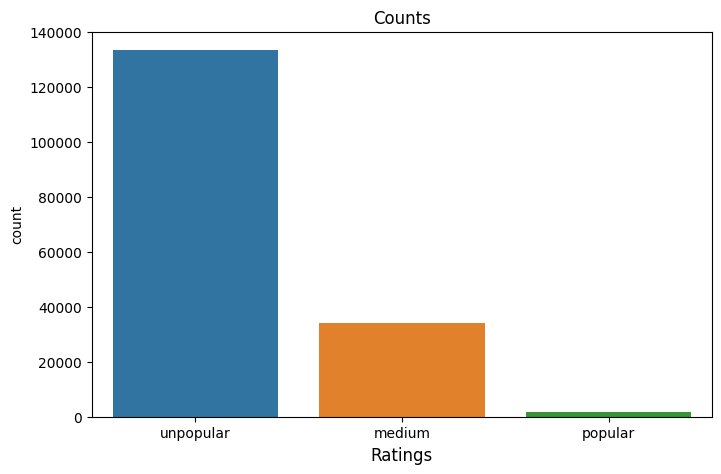

In [ ]:
# Create a new figure and axes with size (8, 5)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Create a countplot of the 'pop_rating' column in the 'classified' DataFrame
sns.countplot(x='pop_rating', data=classified, ax=ax)

# Set the x-axis label and title of the plot
ax.set_xlabel('Ratings', fontsize=12)
ax.set_title('Counts', fontsize=12)

# Show the plot
plt.show()

# Exploratory Data Analysis (EDA)

### The Relationship Between all the Features

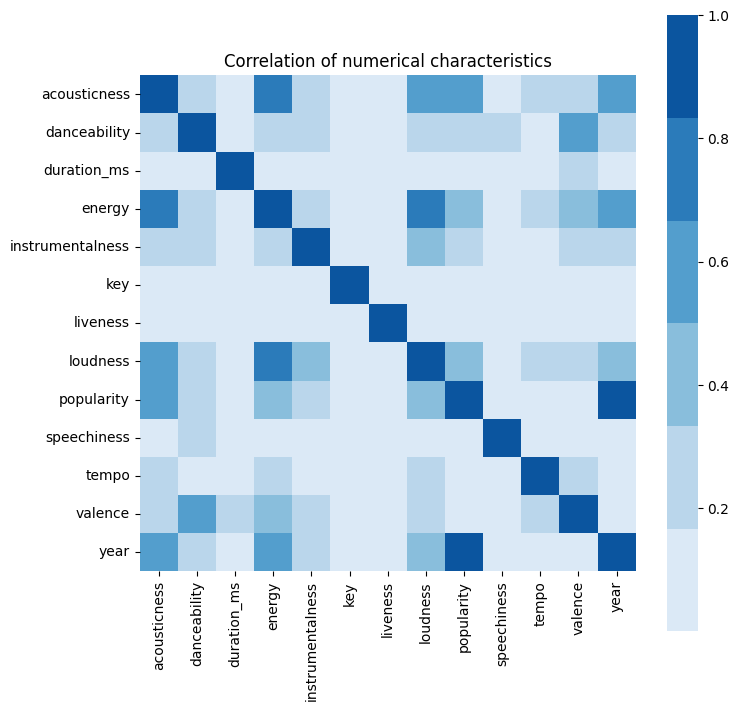

In [ ]:
# Select all columns with numeric data types
numeric_columns = df.columns[df.dtypes != 'object']

# Create a new DataFrame containing only the numeric columns
numeric_df = pd.DataFrame(data=df, columns=numeric_columns, index=df.index)

# Calculate the absolute correlation matrix for the numeric DataFrame
corr = np.abs(numeric_df.corr())

# Create a heatmap of the correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("Blues")
sns.heatmap(corr, cmap=cmap, square=True)

# Set the title of the plot and display it
plt.title('Correlation of numerical characteristics')
plt.show()


### Popularity’s most linearly connected Features

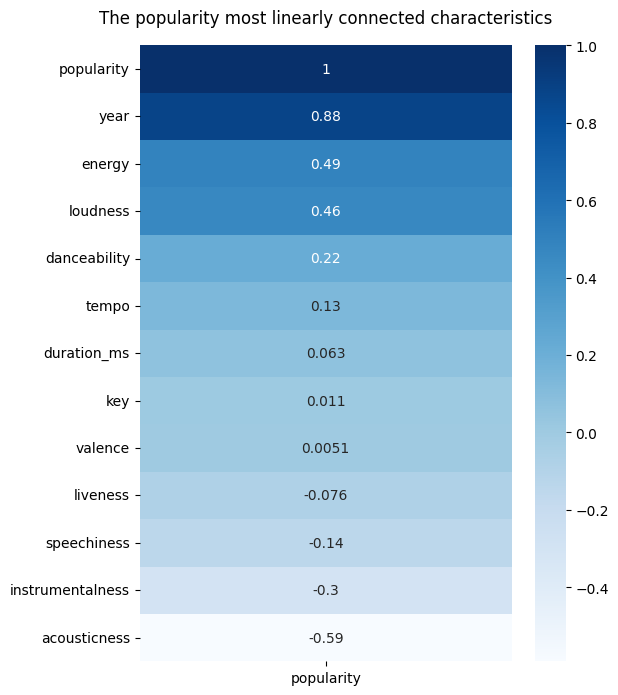

In [ ]:
# Calculate the correlation between the 'popularity' column and all other numeric columns
# in the DataFrame and sort the correlations in descending order
corr = numeric_df.corr()[['popularity']].sort_values(by='popularity', ascending=False)

# Create a new figure with a size of 8x8 inches
plt.figure(figsize=(6, 8))

# Create a heatmap of the correlation matrix with annotations and the 'Blues' colormap
heatmap = sns.heatmap(corr, annot=True, cmap='Blues')

# Set the title of the plot with a font size of 14 points and a padding of 16 points
heatmap.set_title('The popularity most linearly connected characteristics', fontdict={'fontsize':12}, pad=16);


### Mean Popularity across the years

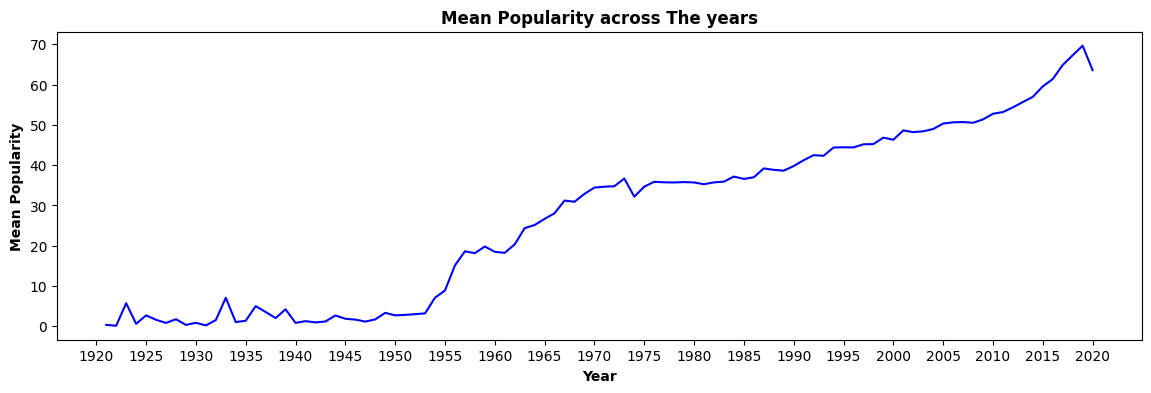

In [ ]:
# Create a new figure with a size of 14x4 inches
fig, ax = plt.subplots(figsize=(14, 4))

# Group the data by year and calculate the mean of the 'popularity' column for each year
mean_popularity = df.groupby('year')['popularity'].mean()

# Create a line plot of the mean popularity over time
ax.plot(mean_popularity.index, mean_popularity.values, color='blue')

# Set the plot title, y-axis label, and x-axis label
ax.set_title('Mean Popularity across The years', c='black', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Year', weight='bold')

# Set the x-ticks to show every 5 years from 1920 to 2020
ax.set_xticks(range(1920, 2021, 5))

# Display the plot
plt.show()


In [ ]:
# Define a function to create a scatterplot with a regression line
def regress_plot(x='', y='', data=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot with a regression line using given inputs'''
    
    # Group the data by the x column, calculate the mean of the y column for each x value, and convert to a DataFrame
    data = data.groupby(x)[y].mean().to_frame().reset_index()
    
    # Create a figure and axes with the desired size
    fig, ax = plt.subplots(figsize=(10,6))
    
    # Create a scatterplot with a regression line using the specified x and y columns, and set the color and size of the points and the color of the line
    _ = sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'b', "s": 10}, line_kws={'color':'black'} )
    
    # Set the label for the x-axis and the font size
    _ = plt.xlabel(xlab, fontsize=12)
    
    # Set the label for the y-axis and the font size
    _ = plt.ylabel(ylab, fontsize=12)
    
    # Set the title of the plot, the font size, and the color
    _ = plt.title(titl, fontsize=14, c='black')
    
    # Set the y-axis limits to the specified range
    _ = plt.ylim(-3, 103)
    
    # Show the plot
    plt.show()



### Mean popularity across the energy

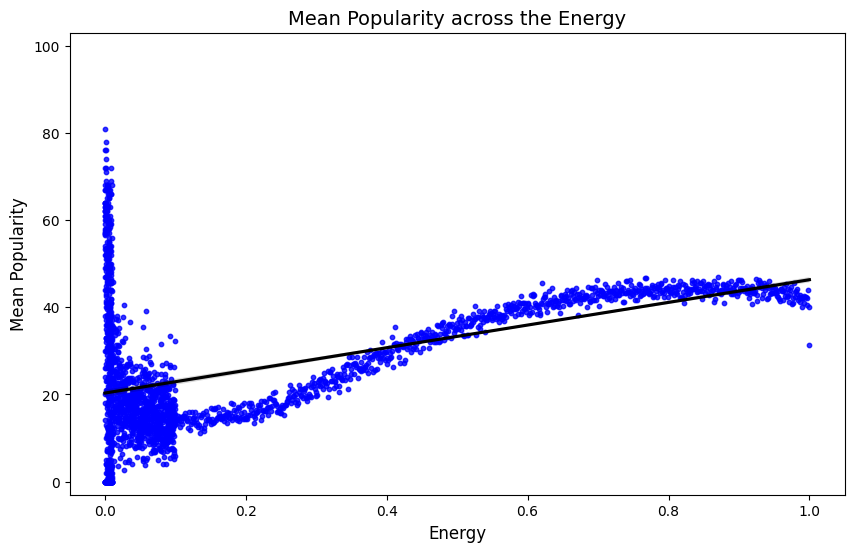

In [ ]:
# Call the regress_plot function with the specified inputs
regress_plot(x='energy', y='popularity', data=df, xlab='Energy', ylab='Mean Popularity', titl='Mean Popularity across the Energy')

### Mean Popularity across Loudness

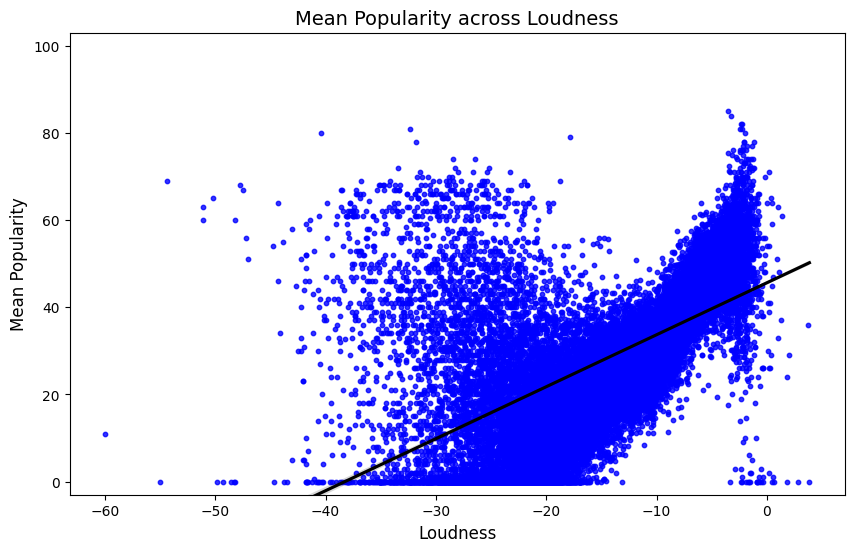

In [ ]:
# Call the regress_plot function with the specified inputs
regress_plot(x='loudness', y='popularity', data=df, xlab='Loudness', ylab='Mean Popularity', titl='Mean Popularity across Loudness')


### Mean popularity across Danceability

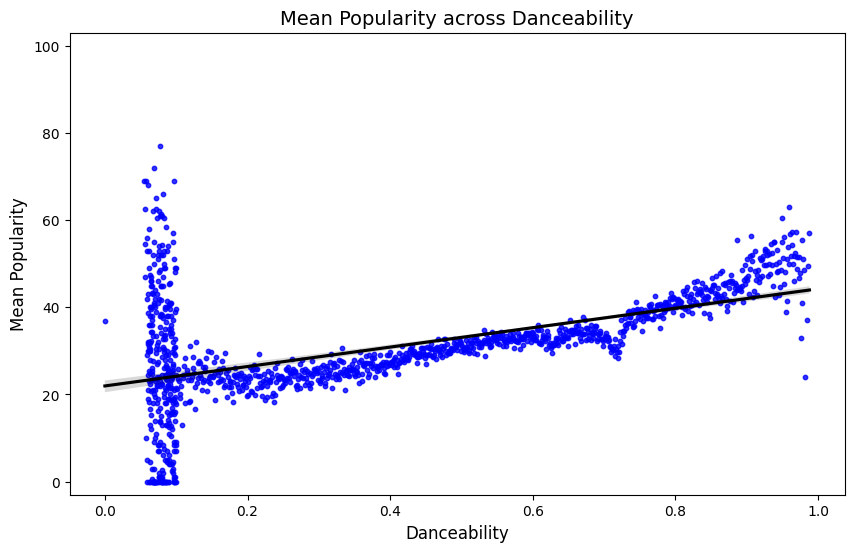

In [ ]:
# Call the regress_plot function with the specified inputs
regress_plot(x='danceability', y='popularity', data=df, xlab='Danceability', ylab='Mean Popularity', titl='Mean Popularity across Danceability')


### Mean popularity across tempo

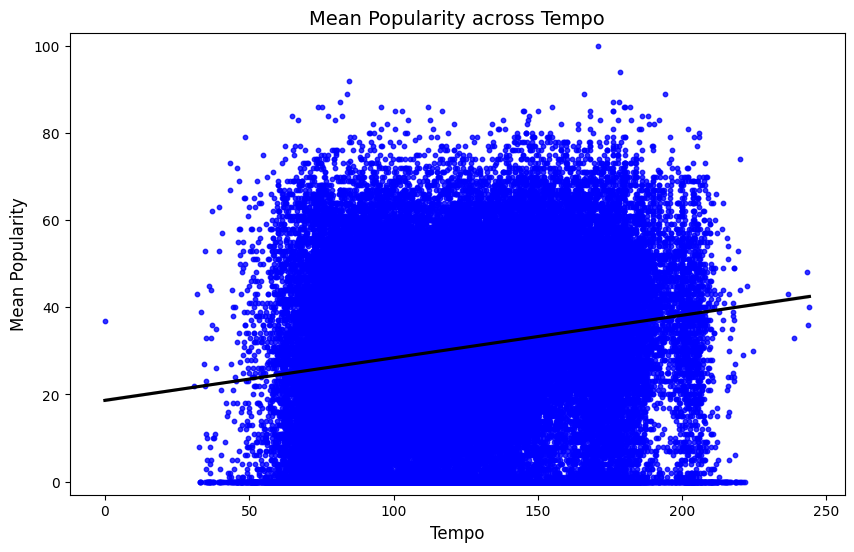

In [ ]:
# Call the regress_plot function with the specified inputs
regress_plot(x='tempo', y='popularity', data=df, xlab='Tempo', ylab='Mean Popularity', titl='Mean Popularity across Tempo')


### Mean popularity across Acousticness

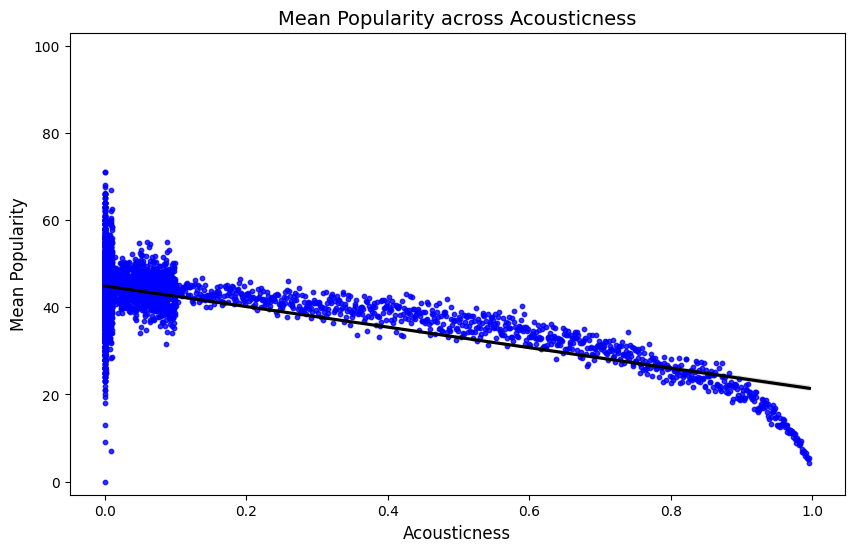

In [ ]:
# Call the regress_plot function with the specified inputs
regress_plot(x='acousticness', y='popularity', data=df, xlab='Acousticness', ylab='Mean Popularity', titl='Mean Popularity across Acousticness')


# Initialisation

### Preparation

In [ ]:
## Import the dataset
df = pd.read_csv('data.csv')

In [ ]:
# Use the 'duplicated' method to identify duplicate rows
# The 'keep' parameter is set to 'first' to keep the first occurrence of each duplicated row
# The resulting Series contains True values for duplicated rows and False values for unique rows
duplicated_rows = df.duplicated(keep='first')

# Use the tilde (~) operator to invert the values in the Series
# This creates a boolean mask that selects only the unique rows
unique_rows = ~duplicated_rows

# Use boolean indexing to select only the unique rows from the DataFrame
# The resulting DataFrame contains no duplicate rows
df = df[unique_rows]


In [ ]:
# Define a function that converts milliseconds to minutes
def ms_to_min(ms):
    return ms / 60000

# Apply the ms_to_min function to the 'duration_ms' column of the DataFrame 'df' 
# and store the result in a new column called 'duration_mins'
df['duration_mins'] = df['duration_ms'].apply(ms_to_min)

# Drop the 'duration_ms' column from the DataFrame 'df'
df.drop('duration_ms', axis=1, inplace=True)


In [ ]:
#Remove the Square Brackets from the artists

df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

<ipython-input-252-1bdc08683c92>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["artists"]=df["artists"].str.replace("[", "")
<ipython-input-252-1bdc08683c92>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["artists"]=df["artists"].str.replace("]", "")


In [ ]:
# Make a copy of the original DataFrame
data = df.copy()

# Create a new column "popularity_level" and assign a value of 1 to rows where "popularity" is between 0 and 30 (inclusive)
data.loc[((df.popularity >= 0) & (df.popularity <= 30)), "popularity_level" ] = 1

# Assign a value of 2 to rows where "popularity" is between 31 and 60 (inclusive)
data.loc[((df.popularity > 30) & (df.popularity <= 60)), "popularity_level" ] = 2

# Assign a value of 3 to rows where "popularity" is between 61 and 100 (inclusive)
data.loc[((df.popularity > 60) & (df.popularity <= 100)), "popularity_level" ] = 3

# Convert the "popularity_level" column to integer type
data["popularity_level"] = data["popularity_level"].astype("int")

# Print the first 10 rows of the DataFrame to check the changes
print(data.head(10))

   acousticness                               artists  danceability  energy  \
0         0.995                       Carl Woitschach         0.708  0.1950   
1         0.994    Robert Schumann, Vladimir Horowitz         0.379  0.0135   
2         0.604                   Seweryn Goszczyński         0.749  0.2200   
3         0.995                      Francisco Canaro         0.781  0.1300   
4         0.990    Frédéric Chopin, Vladimir Horowitz         0.210  0.2040   
5         0.995  Felix Mendelssohn, Vladimir Horowitz         0.424  0.1200   
6         0.956        Franz Liszt, Vladimir Horowitz         0.444  0.1970   
7         0.988                       Carl Woitschach         0.555  0.4210   
8         0.995              Francisco Canaro, Charlo         0.683  0.2070   
9         0.846                   Seweryn Goszczyński         0.674  0.2050   

   explicit                      id  instrumentalness  key  liveness  \
0         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   10

In [ ]:
# Count the number of occurrences of each value in the "popularity_level" column
popularity_counts = data['popularity_level'].value_counts()

# Print the result
print(popularity_counts)

2    77568
1    76724
3    15617
Name: popularity_level, dtype: int64


In [ ]:
# Define a list of artists
artists = ['Drake', 'Lady Gaga', 'Taylor Swift', 'The Weeknd']

# Create a list of indices corresponding to the artists above
# Iterate over each artist and find the indices where the 'artists' column matches the artist name
to_drop = [data[data.artists == name].index.tolist() for name in artists]

# Flatten the list of lists into a single list
to_drop = [ind for sub in to_drop for ind in sub]

# Gather the test cases by selecting rows from the original data using the indices to drop
cases = data[data.index.isin(to_drop)]

# Remove the test cases from the original data by dropping the corresponding rows
data.drop(to_drop, inplace=True)

# Drop unnecessary columns from the modified data
data = data.drop(["popularity", "explicit", "id", "mode", "name", "release_date", "artists"], axis=1)

# Print the head of the modified data
data.head()


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration_mins,popularity_level
0,0.995,0.708,0.1950,0.563,10,0.1510,-12.428,0.0506,118.469,0.7790,1928,2.644133,1
1,0.994,0.379,0.0135,0.901,8,0.0763,-28.454,0.0462,83.972,0.0767,1928,4.702217,1
2,0.604,0.749,0.2200,0.000,5,0.1190,-19.924,0.9290,107.177,0.8800,1928,1.738333,1
3,0.995,0.781,0.1300,0.887,1,0.1110,-14.734,0.0926,108.003,0.7200,1928,3.012667,1
4,0.990,0.210,0.2040,0.908,11,0.0980,-16.829,0.0424,62.149,0.0693,1928,11.462217,1


In [ ]:
# Remove rows where "popularity_level" is equal to 2 and the row index is between 0 and 60000
data.drop(data[data['popularity_level'] == 2].index[0:60000], inplace=True)

# Remove rows where "popularity_level" is equal to 1 and the row index is between 0 and 60000
data.drop(data[data['popularity_level'] == 1].index[0:60000], inplace=True)


In [ ]:
data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration_mins,popularity_level
5085,0.7800,0.554,0.330,0.000003,3,0.1070,-10.866,0.0300,128.214,0.297,1990,4.013333,3
5549,0.2900,0.749,0.662,0.000014,4,0.3550,-7.585,0.0468,126.998,0.740,1994,3.976217,3
5683,0.0309,0.490,0.418,0.000020,2,0.0615,-10.773,0.0572,98.507,0.226,1996,4.654450,3
6167,0.5380,0.585,0.702,0.000000,0,0.2160,-5.734,0.0325,139.909,0.510,2001,3.358883,3
6235,0.0180,0.508,0.826,0.000000,1,0.2800,-4.088,0.0405,120.854,0.404,2001,3.417783,3


In [ ]:
# Extract the "popularity_level" column as the target variable "y"
y = data['popularity_level']

G1= ['key', 'liveness', 'speechiness', 'tempo', 'valence' ]
G2= ['key', 'liveness', 'speechiness', 'tempo', 'valence', 'danceability', 'instrumentalness' ]
G3= ['key', 'liveness', 'speechiness', 'tempo', 'valence', 'danceability', 'instrumentalness', 'energy', 'loudness' ]
G4= ['key', 'liveness', 'speechiness', 'tempo', 'valence', 'danceability', 'instrumentalness', 'energy', 'loudness', 'acousticness' ]

# Drop the "popularity_level" column and assign the resulting DataFrame to "X"
X = data.drop(columns=['popularity_level'])

# Split the data into training and testing sets using a 75/25 split and a random state of 42
# The resulting subsets are assigned to "X_train", "X_test", "y_train", and "y_test"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Transformations of characteristics

In [ ]:
# Define the transformers to be applied to each subset of columns
# 'minmax' will scale the numerical columns 'year', 'tempo', and 'duration_mins' to the range [0, 1]
# 'categorical' will one-hot encode the categorical column 'key'
# 'remainder='passthrough'' will leave the remaining columns as they are
transformers = [
    ('minmax', MinMaxScaler(), ['year', 'tempo', 'duration_mins']),
    ('categorical', OneHotEncoder(), ['key'])
]



# Create a ColumnTransformer object to apply the transformers to the appropriate subsets of columns
ctr = ColumnTransformer(transformers, remainder='passthrough')

# Apply the transformation to the data using the ColumnTransformer object
# Assumes that 'data' is a pandas DataFrame with columns 'year', 'tempo', 'duration_mins', and 'key'
transformed_data = ctr.fit_transform(data)


In [ ]:
# Fit the ColumnTransformer object 'ctr' to the training data 'X_train'
# This step calculates any necessary statistics for the transformers applied by 'ctr'
ctr.fit(X_train)

# Transform the training data 'X_train' using the fitted ColumnTransformer object 'ctr'
# The resulting 'X_train_preprocessed' array contains the transformed features
X_train_preprocessed = ctr.transform(X_train)

# Transform the test data 'X_test' using the fitted ColumnTransformer object 'ctr'
# The resulting 'X_test_preprocessed' array contains the transformed features
# Note that we are reusing the fitted 'ctr' object from the training set, without calling fit again
X_test_preprocessed = ctr.transform(X_test)


##########################

In [ ]:
#Drop columns in G3 from X_train
#X_train = X_train.drop(columns= G4)

#Drop columns in G3 from X_test
#X_test = X_test.drop(columns= G4)

# Prediction Models

In [ ]:
results = []

def run_model(model, alg_name):
   # construct the model using training data
   model.fit(X_train, y_train)
 
   # create forecasts based on test results
   y_pred = model.predict(X_test)

   # determine the accuracy score
   accuracy =  accuracy_score(y_test, y_pred)

   # Calculate the confusion matrix
   cm = confusion_matrix(y_test, y_pred)

   # Perform cross-validation and calculate scores
   scoresDT3 = cross_val_score(model, X_test, y_test, cv=6)

   # Generate the classification report
   Cr = classification_report(y_test, y_pred)

   # Append the algorithm name, accuracy, and model to the results list
   results.append((alg_name, accuracy, model))

   # Print the model name and accuracy score on the test set
   print("Model: ", alg_name)
   print("Accuracy on Test Set for {} = {:.2f}\n".format(alg_name,accuracy))

   # Print the classification report
   print(Cr)
   
   # Print the cross-validation accuracy mean and standard deviation
   print("{}: CrossVal Accuracy Mean: {:.2f} and Standard Deviation: {:.2f} \n".format(alg_name,scoresDT3.mean(), scoresDT3.std()))

In [ ]:
X_train.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration_mins
162627,0.915,0.282,0.359,0.000012,3,0.2030,-9.078,0.0548,79.269,0.217,1947,5.927117
115987,0.388,0.804,0.451,0.000022,6,0.0924,-8.207,0.0949,178.061,0.190,2013,4.188217
151615,0.996,0.179,0.026,0.890000,0,0.0836,-30.937,0.0385,77.116,0.068,2007,5.885783
167804,0.217,0.515,0.590,0.000013,9,0.1280,-7.578,0.0327,117.835,0.208,1999,4.882217
161833,0.663,0.702,0.177,0.000000,11,0.1210,-20.754,0.9560,134.874,0.528,1935,5.276100


### Decision Tree

In [ ]:
#Create a Decision Tree Classifier object
model = DecisionTreeClassifier()

#Call the run_model function to train and evaluate the Decision Tree model 
run_model(model, "Decision Tree")

Model:  Decision Tree
Accuracy on Test Set for Decision Tree = 0.75

              precision    recall  f1-score   support

           1       0.89      0.90      0.90      4147
           2       0.67      0.65      0.66      4338
           3       0.67      0.68      0.68      3869

    accuracy                           0.75     12354
   macro avg       0.75      0.75      0.75     12354
weighted avg       0.75      0.75      0.75     12354

Decision Tree: CrossVal Accuracy Mean: 0.74 and Standard Deviation: 0.01 



In [ ]:
from sklearn.metrics import confusion_matrix

def run_model(model, alg_name):
    # Build the model on training data
    model.fit(X_train, y_train)
 
    # Make predictions for test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    
    # Store the results
    results.append((alg_name, accuracy, model))
    
# Create a Decision Tree Classifier object
model = DecisionTreeClassifier()

# Call the run_model function to train and evaluate the Decision Tree model
run_model(model, "Decision Tree")


Confusion Matrix:
[[3730  287  130]
 [ 303 2856 1179]
 [ 128 1090 2651]]


In [ ]:
# Create an SVM classifier object with polynomial kernel of degree 3 and regularization parameter C=1
model = SVC(kernel='poly', degree=3, C=1)

# Call the run_model function to train and evaluate the SVM Classifier
run_model(model, "SVM Classifier")


Confusion Matrix:
[[3877  260   10]
 [ 286 2907 1145]
 [ 126  766 2977]]


### K-Nearest Neighbor

In [ ]:
# Create a KNN classifier object
model = KNeighborsClassifier()

# Call the run_model function to train and evaluate the KNN model
run_model(model, "Nearest Neighbors Classifier")

Confusion Matrix:
[[3816  299   32]
 [ 222 3350  766]
 [ 104 1125 2640]]


### Logistic Regression

In [ ]:
# Create a Logistic Regression classifier object
model = LogisticRegression(multi_class='multinomial' , solver='lbfgs', max_iter=100)

# Call the run_model function to train and evaluate the Logistic Regression model
run_model(model, "Logistic Regression")

Confusion Matrix:
[[2847  730  570]
 [1018 1785 1535]
 [ 439  944 2486]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Adaboost Classifier

In [ ]:
# Create a Decision Tree Classifier with max depth of 1
dt_b = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create an AdaBoost Classifier with the Decision Tree as the base estimator
model = AdaBoostClassifier(base_estimator=dt_b)

# Call the run_model function with the AdaBoost Classifier model
run_model(model, "Adaboost Classifier")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion Matrix:
[[3795  342   10]
 [  81 2932 1325]
 [  78  946 2845]]


### Random Forest Classifier

In [ ]:
# Create a Random Forest Classifier object
model = RandomForestClassifier(n_estimators=10)

#Call the run_model function with the Random Forest Classifier Model
run_model(model, "Random Forest")

Confusion Matrix:
[[3800  327   20]
 [ 125 3685  528]
 [  80 1270 2519]]


In [ ]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame to store the results
results_df = pd.DataFrame(results, columns=['Algorithm Name', 'Accuracy', 'Model'])

# Print the table of accuracy results
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


╒════╤══════════════════════════════╤════════════╤════════════════════════════════════════════════════════════════════════════╕
│    │ Algorithm Name               │   Accuracy │ Model                                                                      │
╞════╪══════════════════════════════╪════════════╪════════════════════════════════════════════════════════════════════════════╡
│  0 │ Decision Tree                │   0.746803 │ DecisionTreeClassifier()                                                   │
├────┼──────────────────────────────┼────────────┼────────────────────────────────────────────────────────────────────────────┤
│  1 │ Decision Tree                │   0.747693 │ DecisionTreeClassifier()                                                   │
├────┼──────────────────────────────┼────────────┼────────────────────────────────────────────────────────────────────────────┤
│  2 │ SVM Classifier               │   0.790108 │ SVC(C=1, kernel='poly')                              

### Fine Tuning 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create a Random Forest classifier
rf = RandomForestClassifier(max_features='sqrt')

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the model on your training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_


In [ ]:
print(best_params)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [ ]:
# Create a Random Forest Classifier object
model = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=30, bootstrap=True )

#Call the run_model function with the Random Forest Classifier Model
run_model(model, "Random Forest")

Confusion Matrix:
[[3793  344   10]
 [  78 3860  400]
 [  78 1295 2496]]


In [ ]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame to store the results
results_df = pd.DataFrame(results, columns=['Algorithm Name', 'Accuracy', 'Model'])

# Print the table of accuracy results
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════════════════╤════════════╤════════════════════════════════════════════════════════════════════════════╕
│    │ Algorithm Name               │   Accuracy │ Model                                                                      │
╞════╪══════════════════════════════╪════════════╪════════════════════════════════════════════════════════════════════════════╡
│  0 │ Decision Tree                │   0.746803 │ DecisionTreeClassifier()                                                   │
├────┼──────────────────────────────┼────────────┼────────────────────────────────────────────────────────────────────────────┤
│  1 │ Decision Tree                │   0.747693 │ DecisionTreeClassifier()                                                   │
├────┼──────────────────────────────┼────────────┼────────────────────────────────────────────────────────────────────────────┤
│  2 │ SVM Classifier               │   0.790108 │ SVC(C=1, kernel='poly')                              